In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
datas = pd.read_csv('Google_Stock_Price_Train.csv')
training= datas.iloc[:, 1:2].values

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(training)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\PRAVEEN\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PRAVEEN\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PRAVEEN\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PRAVEEN\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarn

In [7]:
model = Sequential() 

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))


model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [9]:
model.fit(x_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0042
Epoch 2/150
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0042
Epoch 3/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 4/150
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0043
Epoch 5/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 6/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0039
Epoch 7/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 8/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0039
Epoch 9/150
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0038A: 0s - loss: 0.
Epoch 10/150
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0039
Epoch 11/150
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0034
Epoch 12/150
1198/1198 [==============================] - 

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 97/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 98/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014A: 0s - loss: 0
Epoch 99/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 100/150
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0015A: 2s -
Epoch 101/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 102/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0013A: 1s - loss
Epoch 103/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 104/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0012
Epoch 105/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 106/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 107/150
1198/1198 [============

In [10]:
# real price
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_price = data_test.iloc[:, 1:2].values

# predicted price
data_total = pd.concat((datas['Open'], data_test['Open']), axis = 0)


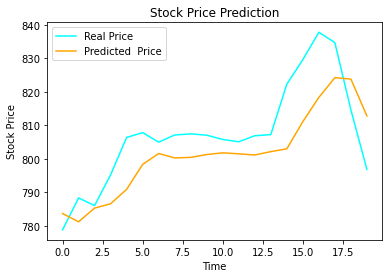

In [19]:
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


plt.plot(real_price, color = 'cyan', label = 'Real Price')
plt.plot(predicted_price, color = 'orange', label = 'Predicted  Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()